In [8]:
import os
from glob import glob
from pcmdi_metrics.enso.lib import enso_portrait_plot
from pcmdi_metrics.utils import download_files_from_github

ImportError: cannot import name 'enso_portrait_plot' from 'pcmdi_metrics.enso.lib' (/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/pcmdi_metrics/enso/lib/__init__.py)

In [2]:
path_json = "json_files"  # v20210620 for CMIP6 and v20210104 for CMIP5
#path_json = "/Users/lee1043/Documents/Research/PMP/ENSO_metrics/PortraitPlot/Interactive_bokeh/script_v20201028/json_files"

list_project = ["CMIP6", "CMIP5"]
#list_project = ["CMIP6"]
#list_project = ["CMIP5"]

list_obs = ["20CRv2", "NCEP2", "ERA-Interim"]
#list_obs = ["20CRv2"]
#list_obs = []

figure_name = "test.png"

In [3]:
metrics_collections = ["ENSO_perf", "ENSO_tel", "ENSO_proc"]
mips = ["CMIP5", "CMIP6", "obs2obs"]

dict_json_path = dict()
for mip in mips:
    dict_json_path[mip] = dict()
    for metrics_collection in metrics_collections:
        dict_json_path[mip][metrics_collection] = glob(os.path.join(path_json, f"{mip.lower()}*{metrics_collection}_*.json"))[0]
        
dict_json_path

{'CMIP5': {'ENSO_perf': 'json_files/cmip5_historical_ENSO_perf_v20210104_allModels_allRuns.json',
  'ENSO_tel': 'json_files/cmip5_historical_ENSO_tel_v20210104_allModels_allRuns.json',
  'ENSO_proc': 'json_files/cmip5_historical_ENSO_proc_v20210104_allModels_allRuns.json'},
 'CMIP6': {'ENSO_perf': 'json_files/cmip6_historical_ENSO_perf_v20210620_allModels_allRuns.json',
  'ENSO_tel': 'json_files/cmip6_historical_ENSO_tel_v20210620_allModels_allRuns.json',
  'ENSO_proc': 'json_files/cmip6_historical_ENSO_proc_v20210620_allModels_allRuns.json'},
 'obs2obs': {'ENSO_perf': 'json_files/obs2obs_ENSO_perf_v20200420.json',
  'ENSO_tel': 'json_files/obs2obs_ENSO_tel_v20200420.json',
  'ENSO_proc': 'json_files/obs2obs_ENSO_proc_v20200420.json'}}

### Show additional rows for CMIP means and alternative observation datasets

### Add my model

In [7]:
db_url = "https://github.com/PCMDI/pcmdi_metrics_results_archive/tree/main/test_case/enso"
path_json_my_model = "json_files/my_model"
download_files_from_github(db_url, path_json_my_model)

Saved my_model_ENSO_proc.json to json_files/my_model/my_model_ENSO_proc.json
Saved my_model_ENSO_tel.json to json_files/my_model/my_model_ENSO_tel.json
Saved my_model_ENSO_perf.json to json_files/my_model/my_model_ENSO_perf.json


In [4]:
dict_json_path["my_model"] = dict()

for metrics_collection in metrics_collections:
    dict_json_path["my_model"][metrics_collection] = glob(os.path.join(path_json_my_model, f"*_{metrics_collection}.json"))[0]
    
#list_project = ["CMIP6", "CMIP5", "my_model"]
list_project = ["CMIP5", "CMIP6", "my_model"]
#list_project = [ "my_model", "CMIP5", "CMIP6"]
list_project = ["CMIP6", "my_model"]

In [5]:
dict_json_path

{'CMIP5': {'ENSO_perf': 'json_files/cmip5_historical_ENSO_perf_v20210104_allModels_allRuns.json',
  'ENSO_tel': 'json_files/cmip5_historical_ENSO_tel_v20210104_allModels_allRuns.json',
  'ENSO_proc': 'json_files/cmip5_historical_ENSO_proc_v20210104_allModels_allRuns.json'},
 'CMIP6': {'ENSO_perf': 'json_files/cmip6_historical_ENSO_perf_v20210620_allModels_allRuns.json',
  'ENSO_tel': 'json_files/cmip6_historical_ENSO_tel_v20210620_allModels_allRuns.json',
  'ENSO_proc': 'json_files/cmip6_historical_ENSO_proc_v20210620_allModels_allRuns.json'},
 'obs2obs': {'ENSO_perf': 'json_files/obs2obs_ENSO_perf_v20200420.json',
  'ENSO_tel': 'json_files/obs2obs_ENSO_tel_v20200420.json',
  'ENSO_proc': 'json_files/obs2obs_ENSO_proc_v20200420.json'},
 'my_model': {'ENSO_perf': '/Users/lee1043/Documents/Research/git/pcmdi_metrics_results_archive/test_case/enso/my_model_ENSO_perf.json',
  'ENSO_tel': '/Users/lee1043/Documents/Research/git/pcmdi_metrics_results_archive/test_case/enso/my_model_ENSO_tel.j

Note: The following keys were considered to be the same:
Predefined reference: GPCPv2.3, reference key in the JSON: GPCP-2-3
Predefined reference: Tropflux, reference key in the JSON: TropFlux-1-0
Note: The following keys were considered to be the same:
Predefined reference: GPCPv2.3, reference key in the JSON: GPCP-2-3
Predefined reference: Tropflux, reference key in the JSON: TropFlux-1-0
Predefined reference: Tropflux_GPCPv2.3, reference key in the JSON: TropFlux-1-0_GPCP-2-3
Predefined reference: ERA-Interim, reference key in the JSON: ERA-INT
Note: The following keys were considered to be the same:
Predefined reference: GPCPv2.3, reference key in the JSON: GPCP-2-3
Predefined reference: Tropflux, reference key in the JSON: TropFlux-1-0
Predefined reference: Tropflux_GPCPv2.3, reference key in the JSON: TropFlux-1-0_GPCP-2-3
Predefined reference: ERA-Interim, reference key in the JSON: ERA-INT
Predefined reference: Tropflux_Tropflux, reference key in the JSON: Tropflux_ERA-Interim


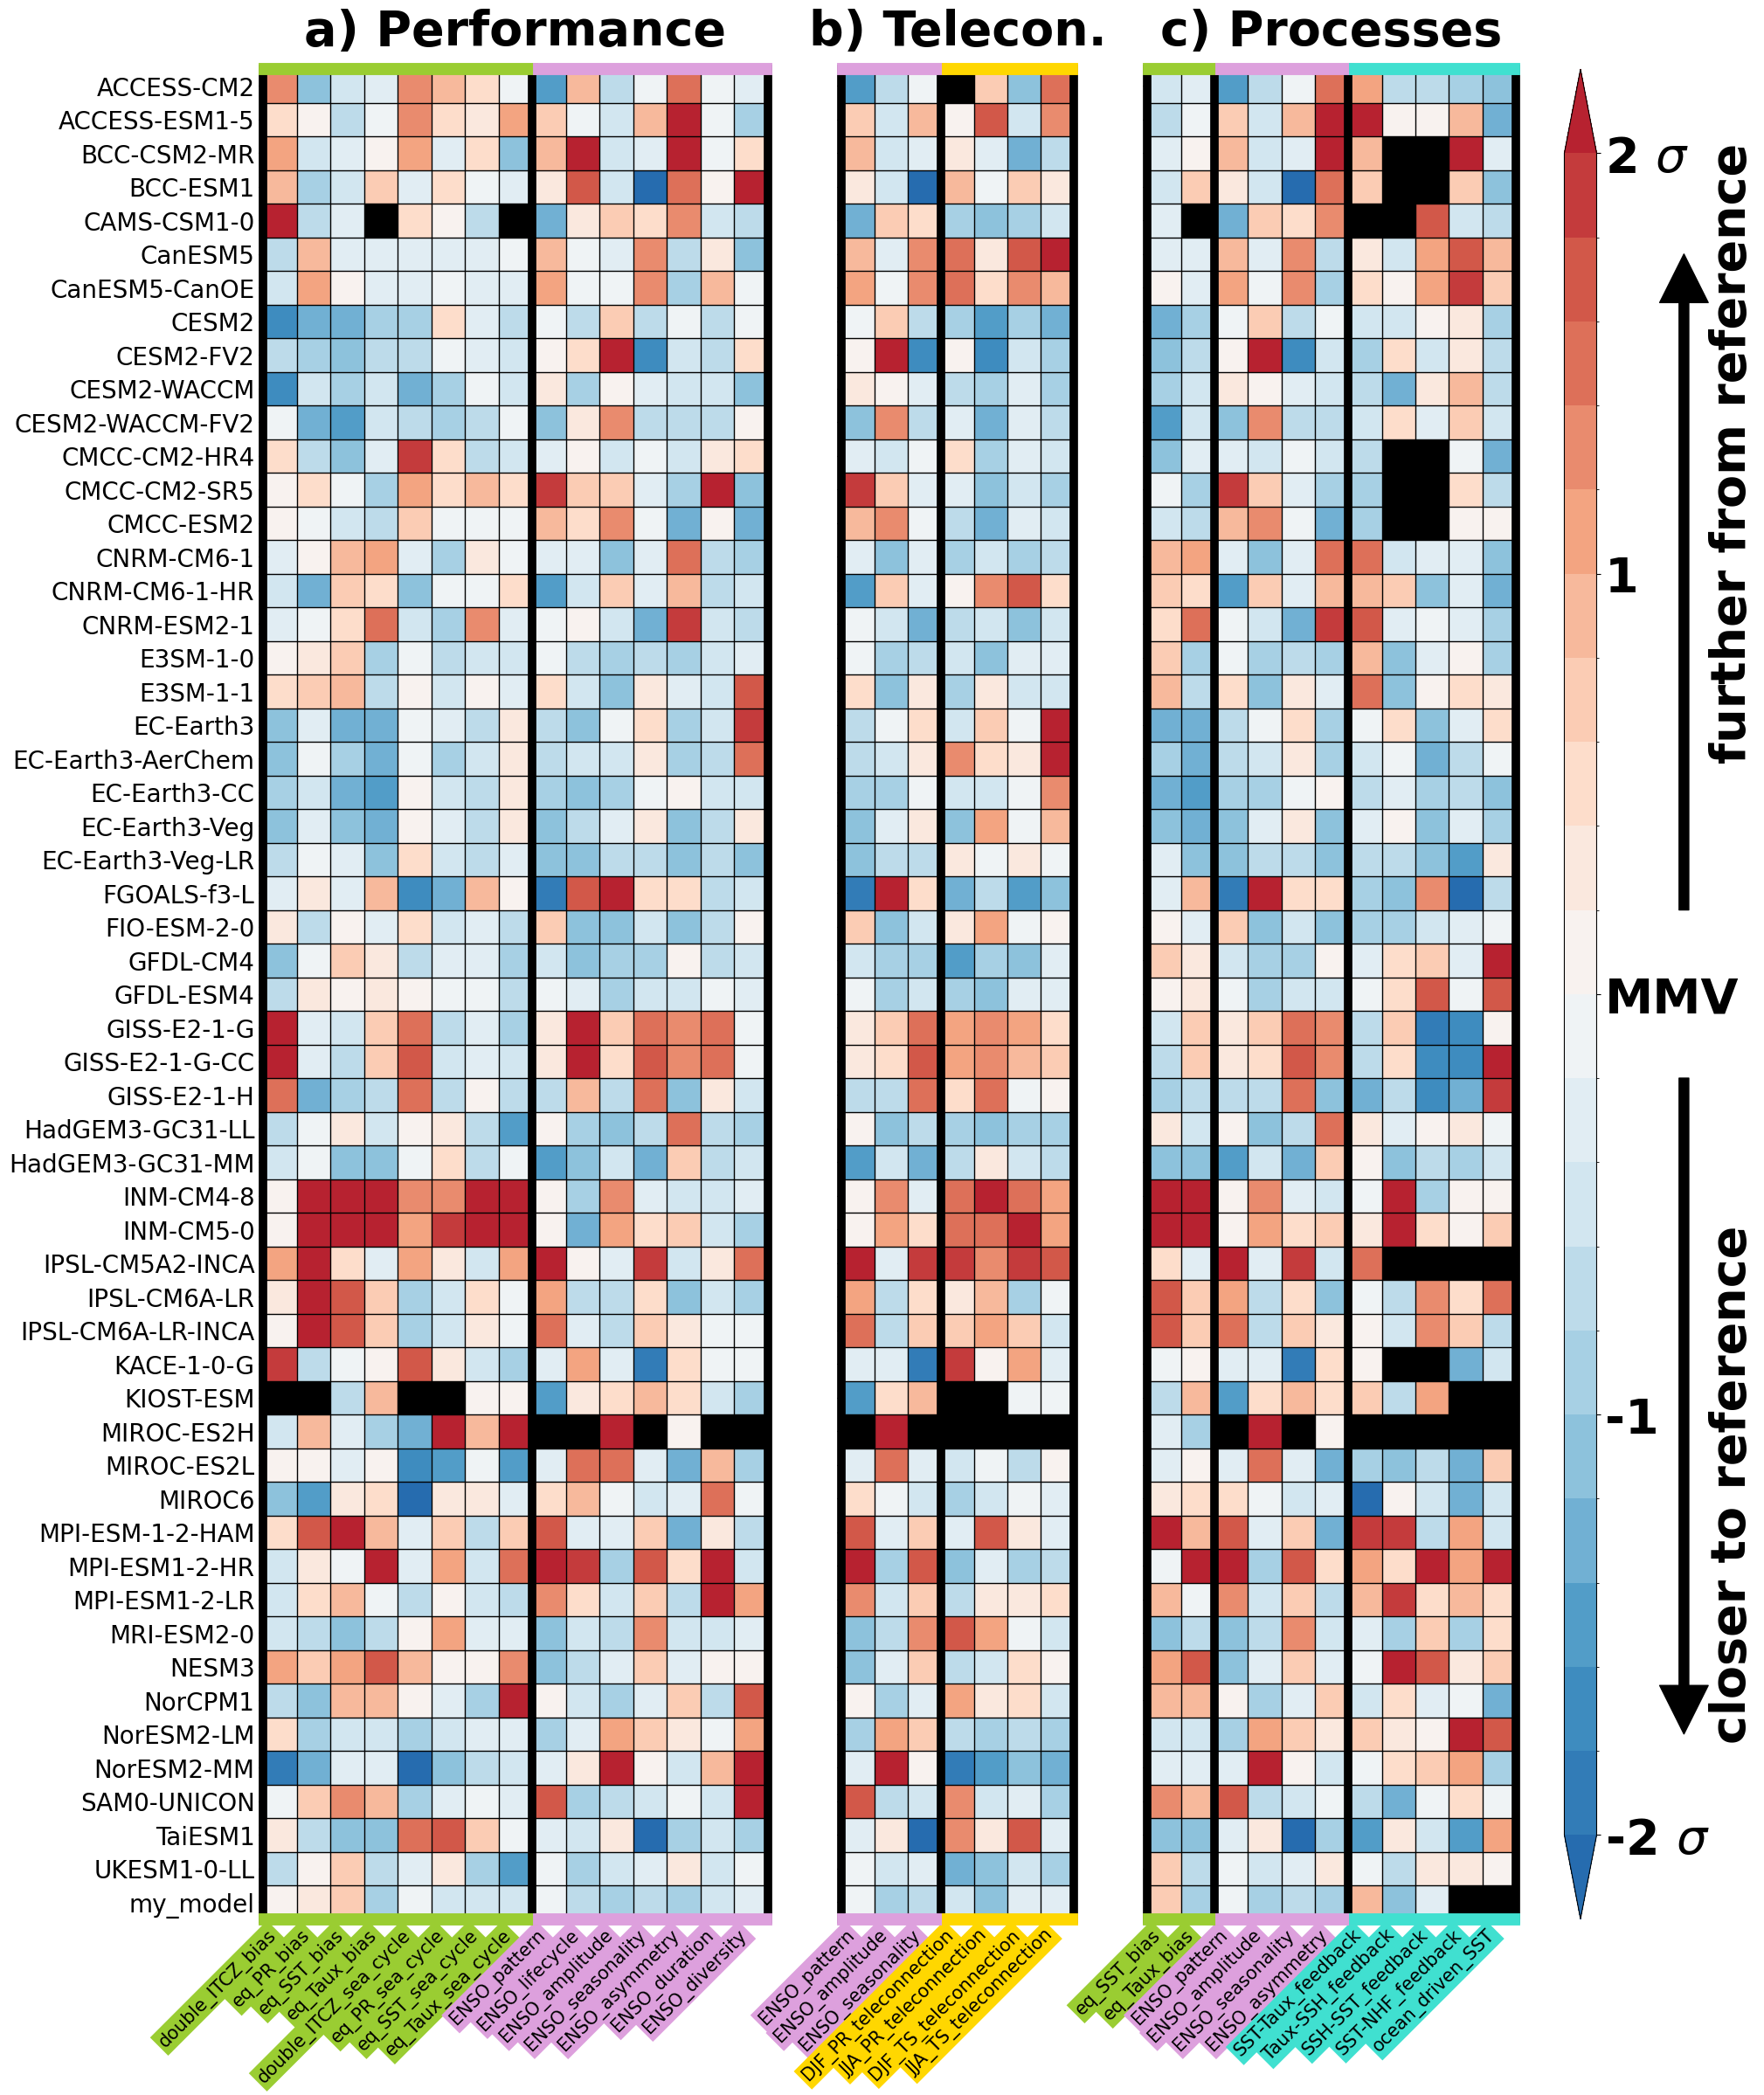

In [6]:
enso_portrait_plot(metrics_collections, list_project, list_obs, dict_json_path, figure_name=figure_name, reduced_set=True)